# Assignment 3: Clustering California Housing with K-means

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
"Tonight, more than 130,000 Californians will go to sleep homeless. That’s enough to fill Dodger Stadium, AT&T Park and Petco Park. The biggest culprit is rising housing costs. From 2000 to 2014, median rent in California increased by more than one-third, while real incomes for renters fell by 7 percent. Today, 1.5 million Californians spend more than half their income on housing. This crisis threatens not just low-income families but our entire economy, driving businesses to relocate to states in which their employees can afford to live. - **Business Insider, Sep 2018.**"

![Half of the homes in San Franciso is now one million or above](https://amp.businessinsider.com/images/573de0b88d3eaea27198a55d-960-480.jpg)

In this assignment, you will attempt to cluster the California Housing by implementing and analyzing the k-means algorithm to the data. K-Means is one of the most popular clustering algorithms. K-means stores k-centroids that it uses to define clusters. A point is considered to be in a particular cluster if it is closer to that cluster's centroid than any other centroid. For references, you may refer to my lecture 9 or Chapter 2 of the textbook if you need additional sample codes to help with your assignment. For deliverables, you must write code in Python and submit this Jupyter Notebook file (.ipynb) to earn a total of 100 pts. You will gain points depending on how you perform in the following sections.

**Note**: In order for your assignment to be graded, you must save your Notebook filename under this format: **yourUvaUserId_assignment_3_kmeans.ipynb**.


---
## 1. PRE-PROCESSING THE DATA (10 pts)

Download the California Housing dataset from the below link. This dataset includes statistics about the median income, median age, average number of rooms per person, average number of persons in a household etc. The statistics were gathered per geographical block.

**Data Acquiring:** Download the dataset from https://www.kaggle.com/camnugent/california-housing-prices

**Data Discovery, Visualization, and Cleaning:** Fortunately, this step have been given to you from chapter 2. However, you should review them and write the code necessary for the purposes of this assignment. 

In [4]:
# Use the following packages
from sklearn.base import BaseEstimator, ClassifierMixin 
from pandas.plotting import scatter_matrix # optional
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Mount your google drive to gain access to uploaded files
drive.mount('/gdrive')

# Import the csv data
%cd /gdrive/My Drive/Colab Notebooks/datafiles
%ls
cali_housing = pd.read_csv('cali_housing.csv')
cali_housing.head()

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/Colab Notebooks/datafiles
cali_housing.csv  clusters_SSE.csv  housing.gsheet
clusters_df.csv   housing.csv       insurance.csv


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
cali_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
cali_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


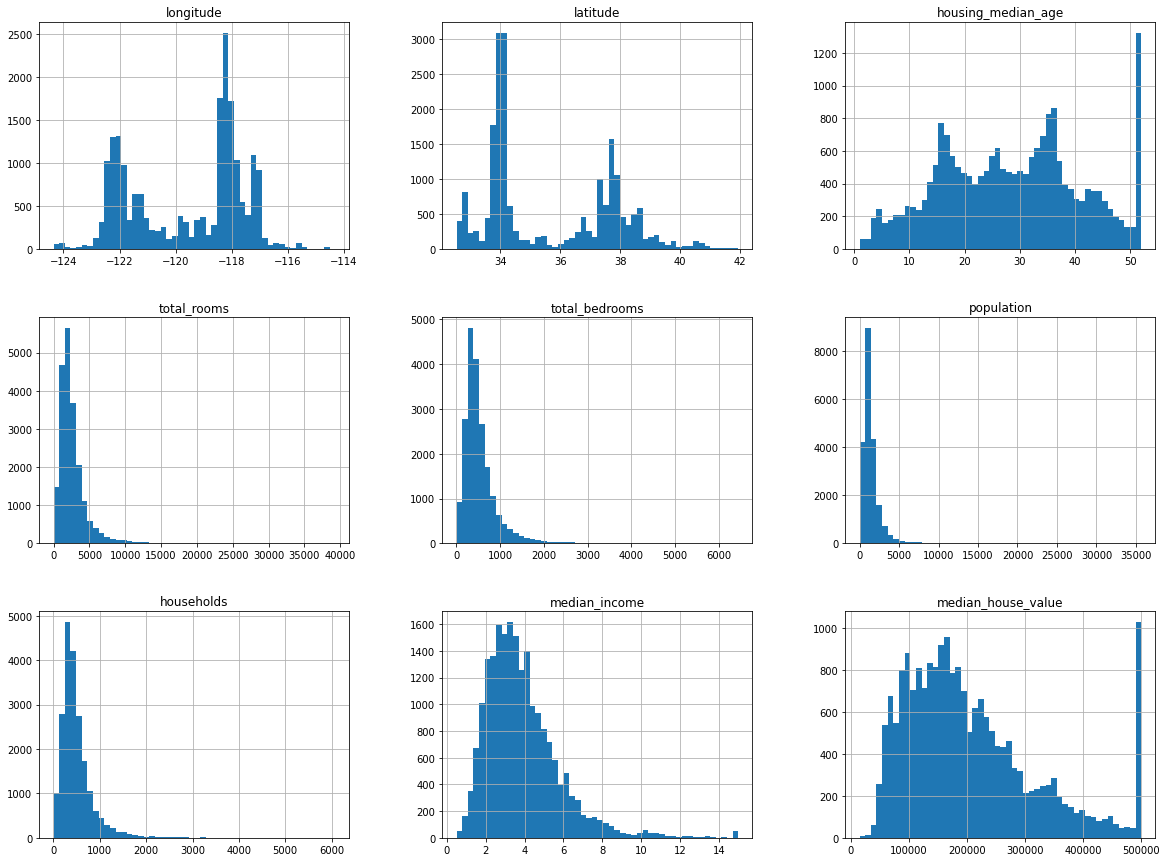

In [ ]:
# Get all of the unique values in the categorical variables 
print(cali_housing['ocean_proximity'].value_counts())

# And plot your data 
%matplotlib inline
import matplotlib.pyplot as plt
cali_housing.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
# Now that you have gotten a feel for the distribution of the data, clean it, scale it and split into test and train sets
from sklearn.model_selection import StratifiedShuffleSplit

# Bin the data in order to use stratified split 
cali_housing["income_cat"] = pd.cut(cali_housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

# Split the data into test and train sets 
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(cali_housing, cali_housing["income_cat"]):
    strat_train_set = cali_housing.loc[train_index]
    strat_test_set = cali_housing.loc[test_index]

In [ ]:
# Check to see if you need to impute your data
incomplete = cali_housing[cali_housing.isnull().any(axis=1)]
incomplete.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY,3
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY,2
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY,2
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY,4
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY,3


In [15]:
# Create a pipeline to impute, scale and convert classifier to numerical for your data 
# Build your own custom pipeline to process your data 
# Here we are going to transform the categorical cols of sex, smoker and region 

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

# Define which columns are numeric and which are categorical 
num_attribs = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 
               'population', 'households', 'median_income', 'median_house_value']
cat_attribs = ['ocean_proximity']

# Replace NAs and scale numeric data
numericTransform = Pipeline([
                          ('replaceNAs', SimpleImputer(strategy='median')),
                          ('scaleBack', StandardScaler())
                ])

# Transform numeric data first then encode categorical 
fullTransform = ColumnTransformer([
                      ('num_transform', numericTransform, num_attribs),
                      ('col_transform', OneHotEncoder(sparse=False), cat_attribs)
                    ])

# Try out your method
#cali_housing.drop(['income_cat'], axis='columns', inplace=True)
cali_housing_numeric = pd.DataFrame(fullTransform.fit_transform(cali_housing))
cali_housing_numeric

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,2.129631,0.0,0.0,0.0,1.0,0.0
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,1.314156,0.0,0.0,0.0,1.0,0.0
2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,1.258693,0.0,0.0,0.0,1.0,0.0
3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,1.165100,0.0,0.0,0.0,1.0,0.0
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,1.172900,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-0.444985,-0.388283,-0.512592,-0.443449,-1.216128,-1.115804,0.0,1.0,0.0,0.0,0.0
20636,-0.818722,1.806329,-0.845393,-0.888704,-0.922403,-0.944405,-1.008420,-0.691593,-1.124470,0.0,1.0,0.0,0.0,0.0
20637,-0.823713,1.778237,-0.924851,-0.174995,-0.123608,-0.369537,-0.174042,-1.142593,-0.992746,0.0,1.0,0.0,0.0,0.0
20638,-0.873626,1.778237,-0.845393,-0.355600,-0.304827,-0.604429,-0.393753,-1.054583,-1.058608,0.0,1.0,0.0,0.0,0.0


In [60]:
# Get the column names for later 
cali_housing_columns = ['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population',
                        'households','median_income','median_housing_val','<1hrOcean','Inland','Island','NearBay','NearOcean']

cali_housing_numeric.sample(n=15, random_state=42)
cali_housing.sample(n=15, random_state=42)

cali_housing_numeric.columns = cali_housing_columns
#cali_housing_numeric.drop(['clusters'], axis='columns', inplace=True)

- - -
## 2. IMPLEMENTING K-MEANS (40 pts)

You must implement your own version of K-Means Algorithm. Input a cluster count K and M data points each with its own vector of N features, along with the choice of a distance measure; then:

1. Initialize K centroids. In our case, a centroid is just the average of all data in a cluster.
2. Assign each data point to the cluster that has the closest centroid base on a **distance measure** below.
3. After all data points have been assigned to clusters, recalculate the centroids for each cluster (as averages of all points in the cluster).
4. Repeat the data assignments and centroid calculations until no change in housing assignment occurs between iterations.

**Distance Measures:** Your implementation must include three distance metrics: Manhattan Distance, Euclidean Distance, Sup Distance. These 3 distance metrics can be generalized by the Minkovski Distance:
$D(\mathbf{x},\mathbf{y}) = \sqrt[\leftroot{2}\uproot{2}p]{\sum\limits_{i=1}^n|x_i - y_i|^p}$ where $p=1$ for Mahattan, $p=2$ for Euclidean, and $p=\infty$ for Sup Distance.

**Implementation Notes:** Note that your functions should return distance measures; that is, the returned value should be high if the two vectors are dissimilar, low if they are similar, and zero if they are completely identical.

In [61]:
# Function: K Means
# -------------
# K-Means is an algorithm that takes in a dataset and a constant
# k and returns k centroids (which define clusters of data in the
# dataset which are similar to one another).

# Functions to return distance between centroid (c) and point (a)
# a and c are np.arrays of size equal to number of features in the data 
def manhattan_dist(a, c):
  summer = 0
  for i in range(len(a)):
    summer += abs(a[i]-c[i])
  return summer

def euclidean_dist(a, c):
  summer = 0
  for i in range(len(a)):
    summer += abs(a[i]-c[i])**2
  return np.sqrt(summer) 

def sup_dist(a, c): 
  dist = []
  for i in range(len(a)):
    dist.append(abs(a[i]-c[i]))
  return max(dist)

class MyKMEANS(BaseEstimator, ClassifierMixin):

  # Set the fields of number of clusters and the type of distance measure
  def __init__(self, k=2, dist_function=manhattan_dist):
    # Number of clusters
    self.k = k 
    # What distance function to use
    self.dist_function = dist_function
    # Most current cluster centroids (np.array of arrays) of size k by number of features
    self.centroids = None
    # Previous and most current cluster indices (np.array): same length as number of rows in your data 
    self.cluster_indices_prev = None
    self.cluster_indices_curr = None 

    # Set up fields to be able to access final calculations 
    self.final_centroids = None
    self.final_clusters = None

  # Set up the first centroids for your data by randomly selecting k number of 
  # rows from your dataframe. THIS FUNCTION WILL INITIALIZE THE SELF.CENTROIDS FIELD
  # given the dataframe X by randomly grabbing k instances from the dataframe
  def initialize_centroids(self, X):
    # Randomly assign k instances of the dataframe to be the first centroids
    self.centroids = np.array(X.sample(n = self.k))

  # Assign each of the X data instances to a particular cluster by calculating the 
  # distance between each instance and each centroid and assigning the point to 
  # the centroid of lowest distance. This function will RETURN AN ARRAY OF CLUSTERS
  # given an input dataframe X and self.centroids
  def assign_clusters(self, X):
    # Need to iterate through the dataframe to assign each row to a cluster
    cluster_idxs = []
    for a in range(len(X)):
      # Calculate the distance between each row in the df and each centroid
      dist = []
      for c in range(len(self.centroids)):
        distcalc = self.dist_function(np.array(X.iloc[a]), self.centroids[c])
        dist.append(distcalc)
      # Select the minimum distance centroid 
      dist = np.array(dist)
      min_dist_idx = int(np.where(dist == dist.min())[0])

      # Append minimium distance idx to cluster_idxs
      cluster_idxs.append(min_dist_idx)

    #print("cluster indexes:", cluster_idxs)
    # Return the cluster indexes list
    return np.array(cluster_idxs)

  # After you have clustered all of your data points, update the centroids for 
  # each cluster by taking the mean of each point in a particular cluster. This   
  # function will UPDATE THIS CLASS'S CENTROIDS FIELD. 
  def update_centroids(self, X, cluster_vec):
    # Add a column of clusters to the data, group rows by clusters and take the mean of each group
    X['clusters'] = cluster_vec
    self.centroids = np.array(X.groupby(['clusters']).mean())

  # Define a function to find the differences between lists
  def ordered_diff(self):
    counter = 0
    for i in range(len(self.cluster_indices_curr)):
      if self.cluster_indices_prev[i] != self.cluster_indices_curr[i]:
        counter +=1
      else: 
        pass
    return counter

  # Make two functions to retrieve final centroids and final clusters. You will 
  # need these in order to calculate the SSE in your model
  def get_centroids(self):
    return self.final_centroids
  def get_clusters(self):
    return self.final_clusters

  # Predictor. Return a vector of indexes of the cluster that you have grouped 
  # each instance into. 
  def fit_predict(self, X):
    # Only needs to be done once: set up the initial cluster centroids, 
    # get the initial clusters and update the centroids 
    self.initialize_centroids(X)
    print("initialized",self.k,"centroids")
    self.cluster_indices_prev = self.assign_clusters(X)
    print("assigned", self.k, "initial clusters")
    self.update_centroids(X.copy(), self.cluster_indices_prev)
    print("updated initial",self.k,"centroids")

    # Iterative steps: continue to assign instances to clusters AND update cluster 
    # centroids until no points change clusters (convergence) in consecutive iterations 
    converged = False
    i = 1
    while converged == False:
     
      # Update the self.cluster_indices_curr field 
      self.cluster_indices_curr = self.assign_clusters(X)

      # Print out the iteration to let the user know where you are at
      print("iteration number:", i)
      print("number of differences between clusters:",self.ordered_diff(),"\n")
      i +=1

      # If the clusters haven't changed since the last iteration, exit loop
      if np.array_equal(self.cluster_indices_curr, self.cluster_indices_prev):
        converged = True

      # If the clusters have changed, update the previous clusters to be the current clusters and 
      # update the centroids
      else: 
        self.cluster_indices_prev = self.cluster_indices_curr
        self.update_centroids(X.copy(), self.cluster_indices_prev)

    # Set fields to be retrieved in get_ functions 
    self.final_centroids = self.centroids
    self.final_clusters = self.cluster_indices_curr


- - -
## 3. CLUSTERING HOUSING INTO REGIONS (40 pts)

Now that you have implemented the K-Means as the clustering algorithm. Applying the algorithm for k=2 clusters to see if you can split California into a Northern and Southern regions.

* **Cluster the data:** Report the SSE (sum squared error), cluster means, within cluster standard deviations for each attribute, etc. Visualize the clustering by plot the latitude along the X axis and longitude along the Y axis. You should get a plot that looks roughly in the shape of California (see Chapter 2 for more details). Using the cluster means and std. deviations as representative values in the cluster, what can you say about the clusters that were found? How do they compare with what you know about cities and areas in California? What can you attribute the gaps to? It will definitely be helpful to have a map of California handy.

* **Change the number of clusters:** Increase the value of k from 2 to 3,4,..,10 and repeat the clustering process above. Record cluster means and standard deviations. When you change k, do any additional patterns emerge? If so, what are they? Applying the algorithm for 10 clusters to see if it clearly identified the silicon valley area as one cluster (where houses are relatively new and expensive, median income is high), the area of San Francisco as another etc. While SF and Silicon Valley may have a somewhat similar profile (at least, compared with mid CA), they were separated mainly due to the latitude/longtitue properties, that involve a dimension of geographical cohesiveness.


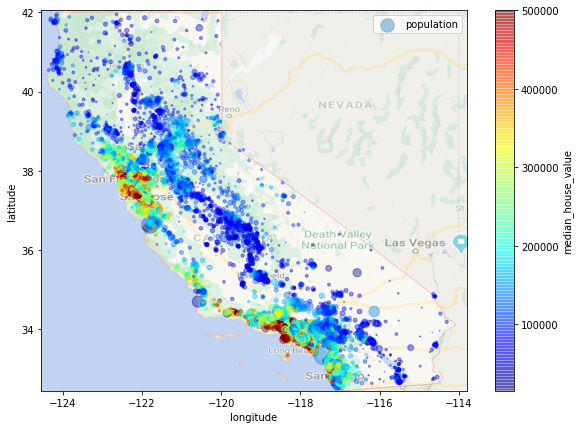

In [6]:
# Plot the latitude and longitude to visualize clusters 
# Incorporate the population into the circle size
# Add color (jet map) for the value of the housing
ax = cali_housing.plot(
                        kind="scatter", x="longitude", y="latitude", alpha=0.4, 
                        s=cali_housing["population"]/100, label="population", 
                        c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
                        figsize=(10,7),
                        sharex=False
                      )

# Add an actual map of california behind the plot of median house val and population on long/lat
import matplotlib.image as mpimg
california_img=mpimg.imread('/gdrive/My Drive/Colab Notebooks/Images/cali_Image.PNG')

plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
            cmap=plt.get_cmap("jet"))

In [145]:
# Function to calculate the sum of squared errors for ALL features
def K_means_SSE(data, kMeansObj):
  # Get the centroids and the clusters
  cali_centriods = kMeansObj.get_centroids()
  cali_clusters = kMeansObj.get_clusters() 
  summer = 0
  for idx in range(len(cali_clusters)):
    # Take distance between instance and corresponding cluster centroid for all of your data
    summer += euclidean_dist(np.array(data.iloc[idx]), cali_centriods[cali_clusters[idx]])
  return summer

# Calculate the feature-by-feature standard deviations within clusters
def sd_cluster_features(data, clusters_list):
  # Get the centroids from the kmeans obj
  data['clusters'] = clusters_list
  list_sd = []
  for col in data.columns:
    list_sd.append(data[col].groupby(data['clusters']).agg(np.std, ddof=0))
  
  return list_sd

def mean_cluster_features(data, clusters_list):
  data['clusters'] = clusters_list
  list_mean = []
  for col in data.columns:
    list_mean.append(data[col].groupby(data['clusters']).agg(np.mean))
  
  return list_mean

# Function to plot the clusters for different k-number of clusters
def plot_clusters(data, clusters_list):
  data['clusters'] = clusters_list

  n_unique = len(pd.unique(data['clusters']))
  titler = 'Plot of ' + str(n_unique) + ' clusters'

  # Overlay dots colored by cluster and sized by population
  myplot = data.plot(
                        title = titler, 
                        kind="scatter", x="longitude", y="latitude", alpha=0.8, 
                        #s=cali_housing["population"]/100, label="population", 
                        c="clusters", cmap=plt.get_cmap("Set1"), colorbar=False,
                        figsize=(10,7),
                        sharex=False
                      )
  

  # Add all of the cluster centroids to the plots
  #centroids = compute_centroids(data, clusters_list)
  # myplot.scatter(x=-1.01, y=1.104, c='b', s=100)
  centroids = compute_centroids(data, clusters_df['k'+str(n_unique)])
  lat = centroids[:,1]
  long = centroids[:,0]
  dat = pd.DataFrame({'long':long,'lat':lat})
  
  # Add the centroids stars to the plot
  plt.scatter(dat['long'], dat['lat'],marker='*', s=500, c='black')

  # Underlay California Image
  plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)

# Compute final centroids from the clusters list and the data given so you don't 
# have to access fields in a kMeansObject
def compute_centroids(df, clusters_list):
  data = df.copy()
  data['clusters'] = clusters_list
  return np.array(data.groupby(['clusters']).mean())

In [147]:
vals2 = mean_cluster_features(cali_housing_numeric, clusters_df['k2'])
vals3 = mean_cluster_features(cali_housing_numeric, clusters_df['k3'])
vals4 = mean_cluster_features(cali_housing_numeric, clusters_df['k4'])
vals5 = mean_cluster_features(cali_housing_numeric, clusters_df['k5'])
vals6 = mean_cluster_features(cali_housing_numeric, clusters_df['k6'])
vals7 = mean_cluster_features(cali_housing_numeric, clusters_df['k7'])
vals8 = mean_cluster_features(cali_housing_numeric, clusters_df['k8'])
vals9 = mean_cluster_features(cali_housing_numeric, clusters_df['k9'])
vals10 = mean_cluster_features(cali_housing_numeric, clusters_df['k10'])


mean_features = pd.DataFrame()
for i in range(len(cali_housing_numeric.columns)):
  df = pd.DataFrame({'k2':vals2[i], 'k3':vals3[i], 'k4':vals4[i], 'k5':vals5[i], 
                     'k6':vals6[i], 'k7':vals7[i], 'k8':vals8[i], 'k9':vals9[i], 
                     'k10':vals10[i], 'attribute':cali_housing_numeric.columns[i]})
  print(cali_housing_numeric.columns[i])
  mean_features=mean_features.append(df)

mean_features.loc[mean_features['attribute']=='median_housing_val',:]

longitude
latitude
housing_median_age
total_rooms
total_bedrooms
population
households
median_income
median_housing_val
<1hrOcean
Inland
Island
NearBay
NearOcean
clusters


,k2,k3,k4,k5,k6,k7,k8,k9,k10,attribute
clusters,,,,,,,,,,
0,0.140924,0.143215,-0.406164,0.066218,-0.297203,0.104401,0.106265,-0.177771,-0.221266,median_housing_val
1,-0.018543,-0.131625,0.076736,-0.279224,0.075809,1.716639,-0.323919,0.112282,1.155737,median_housing_val
2,NaN,0.081112,1.718320,-0.424455,1.654046,-0.283795,1.390973,-0.839109,0.977262,median_housing_val
3,NaN,NaN,-0.281479,1.754047,-0.824282,0.512817,0.051218,-0.322392,2.314727,median_housing_val
4,NaN,NaN,NaN,0.047220,0.032381,0.053960,-0.787613,-0.076193,0.124995,median_housing_val
5,NaN,NaN,NaN,NaN,0.581882,-0.853986,-0.352687,-0.225220,-0.568505,median_housing_val
6,NaN,NaN,NaN,NaN,NaN,-0.055252,-0.069340,1.564034,-0.473878,median_housing_val
7,NaN,NaN,NaN,NaN,NaN,NaN,1.485923,0.168316,-0.071668,median_housing_val
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.497226,0.142551,median_housing_val


In [132]:
# Compute Standard deviation for each cluster for each k groups of clusters 
# for all attributes. Throw into a dataframe for further analysis

vals2 = sd_cluster_features(cali_housing_numeric, clusters_df['k2'])
vals3 = sd_cluster_features(cali_housing_numeric, clusters_df['k3'])
vals4 = sd_cluster_features(cali_housing_numeric, clusters_df['k4'])
vals5 = sd_cluster_features(cali_housing_numeric, clusters_df['k5'])
vals6 = sd_cluster_features(cali_housing_numeric, clusters_df['k6'])
vals7 = sd_cluster_features(cali_housing_numeric, clusters_df['k7'])
vals8 = sd_cluster_features(cali_housing_numeric, clusters_df['k8'])
vals9 = sd_cluster_features(cali_housing_numeric, clusters_df['k9'])
vals10 = sd_cluster_features(cali_housing_numeric, clusters_df['k10'])


sd_features = pd.DataFrame()
for i in range(len(cali_housing_numeric.columns)):
  df = pd.DataFrame({'k2':vals2[i], 'k3':vals3[i], 'k4':vals4[i], 'k5':vals5[i], 
                     'k6':vals6[i], 'k7':vals7[i], 'k8':vals8[i], 'k9':vals9[i], 
                     'k10':vals10[i], 'attribute':cali_housing_numeric.columns[i]})
  print(cali_housing_numeric.columns[i])
  sd_features=sd_features.append(df)

sd_features.loc[sd_features['attribute']=='median_housing_val',:]


longitude
latitude
housing_median_age
total_rooms
total_bedrooms
population
households
median_income
median_housing_val
<1hrOcean
Inland
Island
NearBay
NearOcean
clusters
k9


,k2,k3,k4,k5,k6,k7,k8,k9,k10,attribute
clusters,,,,,,,,,,
0,0.933532,0.942448,0.724820,0.846723,0.576500,0.882465,0.888698,0.745314,0.634358,median_housing_val
1,1.006953,1.024566,0.861427,0.605709,0.857612,0.769805,0.693734,0.908390,0.750089,median_housing_val
2,NaN,0.977258,0.715981,0.721648,0.788915,0.598465,0.802330,0.423049,0.792054,median_housing_val
3,NaN,NaN,0.596038,0.708738,0.411080,0.900725,0.798511,0.574088,0.461075,median_housing_val
4,NaN,NaN,NaN,0.837401,0.826234,0.814480,0.439099,0.728029,0.905410,median_housing_val
5,NaN,NaN,NaN,NaN,0.868360,0.404383,0.541741,0.612887,0.553116,median_housing_val
6,NaN,NaN,NaN,NaN,NaN,0.754701,0.745226,0.793225,0.468597,median_housing_val
7,NaN,NaN,NaN,NaN,NaN,NaN,0.811316,0.839229,0.744929,median_housing_val
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.791203,0.832358,median_housing_val


In [168]:
def ranger(X):
  return np.max(X)-np.min(X)
mean_features.groupby(by='attribute').apply(ranger)

,k2,k3,k4,k5,k6,k7,k8,k9,k10
attribute,,,,,,,,,
<1hrOcean,0.038509,0.481027,0.476830,0.490910,0.644898,0.635115,0.674591,0.696110,0.708310
Inland,0.010022,0.285016,0.472904,0.477279,0.777490,0.798805,0.781388,0.815447,0.816838
Island,0.000274,0.000473,0.000456,0.000624,0.000652,0.000728,0.001262,0.000752,0.001087
NearBay,0.032664,0.257262,0.237195,0.238373,0.527234,0.560596,0.458233,0.519222,0.460533
NearOcean,0.015592,0.060779,0.103193,0.110315,0.144638,0.149664,0.153758,0.168267,0.178980
clusters,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000
households,2.272665,2.670791,2.796668,5.367516,5.490196,4.868210,4.974436,6.453657,6.689848
housing_median_age,0.991545,1.043423,1.068093,1.499851,2.005113,2.094750,2.363294,2.592901,2.527697
latitude,0.198017,1.885175,1.915771,1.927342,1.978517,1.958859,1.923437,1.943657,1.966735


In [169]:
# Find max SD value for each number of clusters for each attribute. 
sd_features.groupby(by='attribute').apply(max)

,k2,k3,k4,k5,k6,k7,k8,k9,k10,attribute
attribute,,,,,,,,,,
<1hrOcean,0.499455,0.498769,0.498564,0.499807,0.499960,0.494047,0.495684,0.499959,0.499494,<1hrOcean
Inland,0.468840,0.499298,0.498869,0.498396,0.496994,0.494416,0.494216,0.490566,0.490421,Inland
Island,0.016554,0.021736,0.021349,0.024978,0.025534,0.026978,0.035496,0.027405,0.032951,Island
NearBay,0.318717,0.437125,0.425363,0.426088,0.499258,0.496315,0.498252,0.499630,0.498440,NearBay
NearOcean,0.336954,0.364712,0.388350,0.392004,0.381966,0.384173,0.386362,0.393404,0.402670,NearOcean
clusters,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,clusters
households,1.487670,1.581029,1.605119,2.022667,2.021324,1.942588,1.957115,2.023666,2.035966,households
housing_median_age,0.972577,1.042022,1.038264,1.033209,0.997124,0.990122,1.000646,0.991603,1.061164,housing_median_age
latitude,1.007399,0.904900,0.914951,0.902859,0.886629,0.881165,0.868271,0.920846,0.930567,latitude


In [ ]:
# Implement K-means for 2 clusters 
kMeans2 = MyKMEANS(k=2, dist_function=euclidean_dist)
kMeans2.fit_predict(cali_housing_numeric)

In [ ]:
# print the sum of squared error for ALL features 
print("SSE for clustering all features: ", K_means_SSE(cali_housing_numeric.copy(), kMeans2), "\n")
SSE_k2 = K_means_SSE(cali_housing_numeric.copy(), kMeans2)

# print the centroids of your data
print("Cluster Means / Centroids: ", kMeans2.get_centroids(), "\n")
sd_cluster_features(cali_housing_numeric.copy(), kMeans2)

SSE for clustering all features:  52793.26275339041 

Cluster Means / Centroids:  [[ 1.84844887e-01 -1.74992034e-01 -8.76249370e-01  1.93148165e+00
   2.00590601e+00  1.85671591e+00  2.00840199e+00  1.60823919e-01
   1.40924230e-01  4.76666667e-01  3.26250000e-01  0.00000000e+00
   8.20833333e-02  1.15000000e-01]
 [-2.43216957e-02  2.30252677e-02  1.15295970e-01 -2.54142323e-01
  -2.63935002e-01 -2.44304725e-01 -2.64263420e-01 -2.11610420e-02
  -1.85426618e-02  4.38157895e-01  3.16228070e-01  2.74122807e-04
   1.14747807e-01  1.30592105e-01]] 

            count      mean       std  ...       50%       75%       max
clusters                               ...                              
0          2400.0  0.184845  0.982709  ...  0.598809  0.938218  2.545419
1         18240.0 -0.024322  0.999766  ...  0.498983  0.763522  2.625280

[2 rows x 8 columns] 

            count      mean       std  ...       50%       75%       max
clusters                               ...                  

In [ ]:
# Perform kMeans for k = 3 through k = 10. Also get the 
# SSE for each of the kMeans calculations
kMeans3 = MyKMEANS(k=3, dist_function=euclidean_dist)
kMeans3.fit_predict(cali_housing_numeric)
SSE_k3 = K_means_SSE(cali_housing_numeric.copy(), kMeans3)

kMeans4 = MyKMEANS(k=4, dist_function=euclidean_dist)
kMeans4.fit_predict(cali_housing_numeric)
SSE_k4 = K_means_SSE(cali_housing_numeric.copy(), kMeans4)

kMeans5 = MyKMEANS(k=5, dist_function=euclidean_dist)
kMeans5.fit_predict(cali_housing_numeric)
SSE_k5 = K_means_SSE(cali_housing_numeric.copy(), kMeans5)

kMeans6 = MyKMEANS(k=6, dist_function=euclidean_dist)
kMeans6.fit_predict(cali_housing_numeric)
SSE_k6 = K_means_SSE(cali_housing_numeric.copy(), kMeans6)

In [ ]:
kMeans7 = MyKMEANS(k=7, dist_function=euclidean_dist)
kMeans7.fit_predict(cali_housing_numeric)
SSE_k7 = K_means_SSE(cali_housing_numeric.copy(), kMeans7)

kMeans8 = MyKMEANS(k=8, dist_function=euclidean_dist)
kMeans8.fit_predict(cali_housing_numeric)
SSE_k8 = K_means_SSE(cali_housing_numeric.copy(), kMeans8)

kMeans9 = MyKMEANS(k=9, dist_function=euclidean_dist)
kMeans9.fit_predict(cali_housing_numeric)
SSE_k9 = K_means_SSE(cali_housing_numeric.copy(), kMeans9)

kMeans10 = MyKMEANS(k=10, dist_function=euclidean_dist)
kMeans10.fit_predict(cali_housing_numeric)
SSE_k10 = K_means_SSE(cali_housing_numeric.copy(), kMeans10)

In [ ]:
# Save a CSV file of all of all of the clusters so you don't have to run this godforsaken 
# code block above for 45 minutes each runtime 
clusters_df = pd.DataFrame(data = { 'k2':kMeans2.get_clusters(), 'k3':kMeans3.get_clusters(), 'k4':kMeans4.get_clusters(), 
                                    'k5':kMeans5.get_clusters(), 'k6':kMeans6.get_clusters(), 'k7':kMeans7.get_clusters(),
                                    'k8':kMeans8.get_clusters(), 'k9':kMeans9.get_clusters(), 'k10':kMeans10.get_clusters()})

Kmeans_SSE = pd.DataFrame(data={'SSE':[SSE_k2 ,SSE_k3, SSE_k4, SSE_k5, SSE_k6, SSE_k7, SSE_k8, SSE_k9, SSE_k10], 'k':[2,3,4,5,6,7,8,9,10]})

%pwd

clusters_df.to_csv('/gdrive/My Drive/Colab Notebooks/datafiles/clusters_df.csv')
Kmeans_SSE.to_csv('/gdrive/My Drive/Colab Notebooks/datafiles/clusters_SSE.csv')

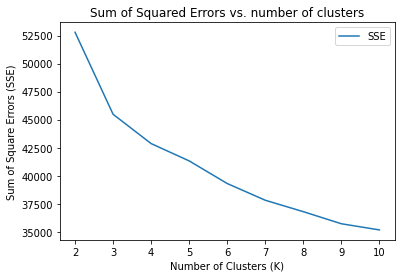

In [8]:
# Plot the SSE error vs number of clusters to see what number of clusters you 
# may wish to consider using the 'elbow' of the plot as your reference
Kmeans_SSE = pd.read_csv('/gdrive/My Drive/Colab Notebooks/datafiles/clusters_SSE.csv')
Kmeans_SSE.plot(x='k',y='SSE',kind='line',
                title='Sum of Squared Errors vs. number of clusters',
                xlabel='Number of Clusters (K)', ylabel='Sum of Square Errors (SSE)')

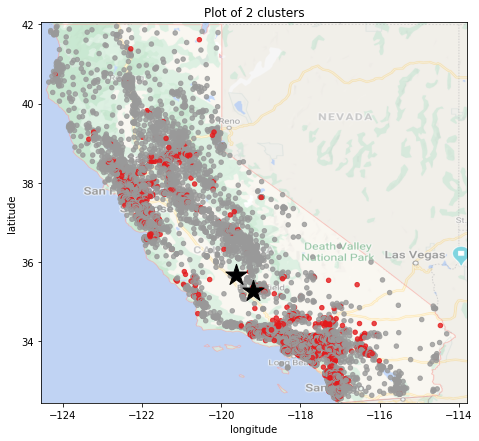

In [136]:
# Import the csv with all of the precomputed clusters
clusters_df = pd.read_csv('clusters_df.csv')
plot_clusters(cali_housing, clusters_df['k2'])

Ok Cool! Looks like our clustering algorithm worked pretty well in separating urban and rural california into two groups, with urban (red) concentrated around San Francisco and Los Angeles and gray around the lesser populated, lower house value areas in california. 

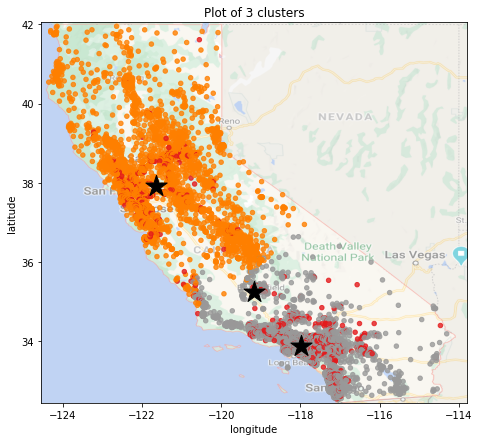

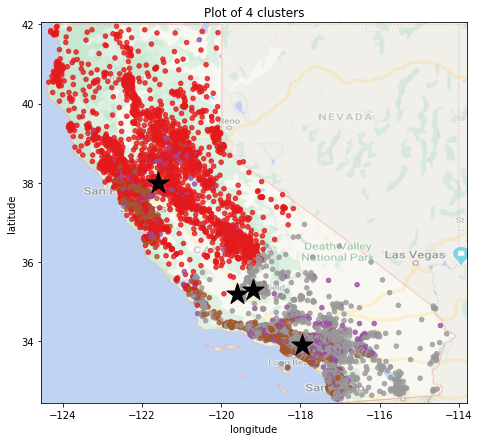

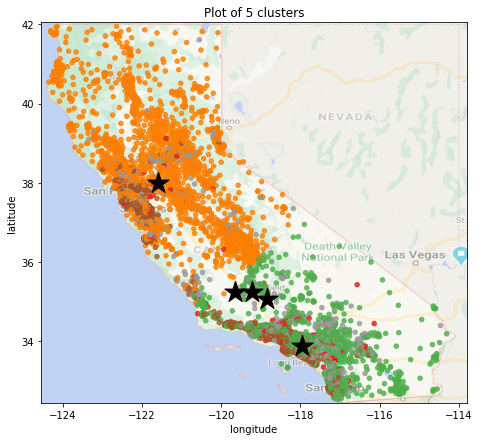

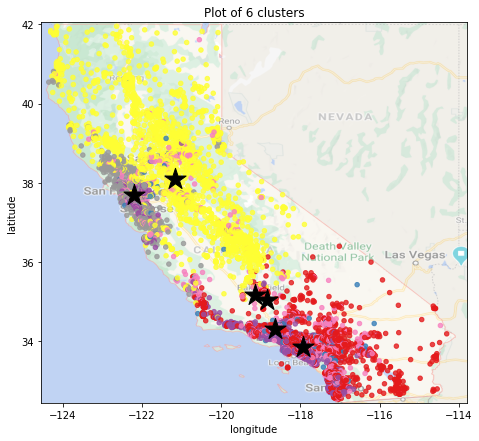

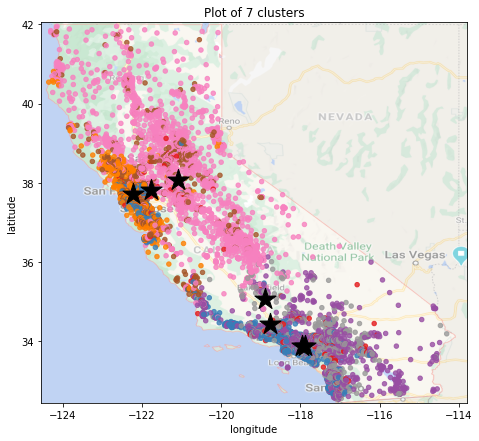

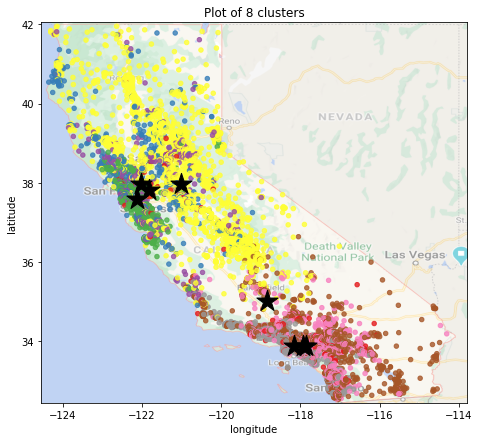

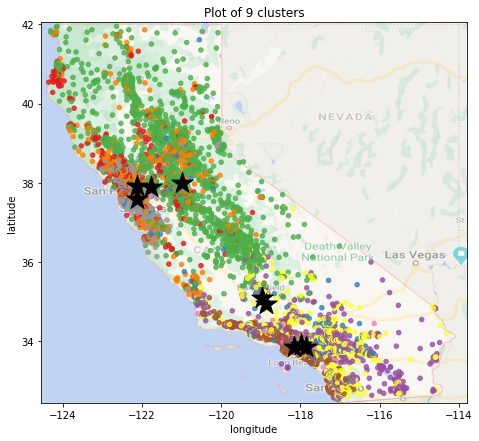

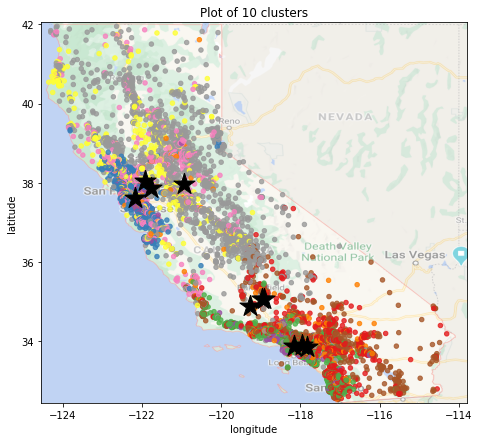

In [137]:
# Plot California with k number of clusters from 2 to 10 
k_means_vals = ['k3','k4','k5','k6','k7','k8','k9','k10']
for i in k_means_vals:
  plot_clusters(cali_housing, clusters_df[i])

- - -
## 4. WRITING ON THE INTUITION FOR THE CALIFORNIA HOUSING CRISIS (10 pts)

This question is a qualitative one, and is intended to let you experiment with a real world clustering task. Hopefully it gives you some intuition as for how the preset number of clusters affects the clustering results. Too few clusters may not reveal the information that is in the data. Too many clusters may hurt data analysis as well, as it may not generalize (and in this sense, it is equivalent to over fitting).

Write at least one paragraph to demonstrate your intuition on the California Housing Crisis. You might also want to mention some possible solutions to solve it. You will receive credits based upon your insights and intuitions on this challenge. 



It was very difficult for me to visualize exactly what is happening in the clustering process because each point exists in more than 10 dimensions and we are limited in our ability to project this information onto a 2 dimensional surface. Furthermore, the data provided to us demonstrates a high population density near the cities in california which is largely where our centroids ended up converging. 

However, the maps yielded some interesting insights: for example, each k-clustering task with more than 5 clusters had a centroid located exactly in the silcon valley region and every clustering combination with three or more clusters had a centroid in LA and between Sacremento and San Francisco. Each map with more than 3 clusters showed that the urban areas and big cities could all be grouped together and North and South California have a somewhat significant difference in rural housing prices. The presence of multiple centroids in the middle of the state suggests that the prices are more similar between large cities than between similar locations in the same general location (east/west, north/south). 

To solve the housing crisis in california I would recommend that the goverment spend more money on building efficent roadways and public transportation vessels to connect cities (places of work) to the more affordable housing locations in close proximity to the city. It looks as though there are plenty of nearby (<80 miles) more rural locations that would provide a longer commute to work but may result in cheaper living conditions for the masses, especially if fast public transit systems could be set up (hyperloop anyone?). 

As for choosing the right number of clusters, it was mentioned in the lectures that there is no deterministic approach to solving this problem and that you should generally choose the number of clusters that lies at the 'elbow' (greatest change in slope between two points) of the SSE - K clusters graph. If that were true, judging by my SSE - K clusters plot I would choose 3 clusters as it appears to be the elbow. I can not, however solely advocate for this choice at the min mean for any cluster in K=3 clusters was higher than most other min mean cluster for the attribute that is most important to us - median housing value. By the same token, the number of clusters with the lowest min cluster-wise mean for median housing value was K=8. 

- - - 
### NEED HELP?

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my lectures and/or the textbook
 * Talk to the TA, they are available and there to help you during their OH.
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4774 Assignment 3:...".

Best of luck and have fun!